In [1]:
import sympy as smp 
import numpy as np 
import matplotlib.pyplot as plt 

plt.style.use('bmh')

In [2]:
x, y, z, u1, u2, u3, v1, v2, v3, t = smp.symbols('x y z u_1 u_2 u_3 v_1 v_2 v_3 t')

# Vectors and Matrices

In [3]:
u = smp.Matrix([u1, u2, u3])
v = smp.Matrix([v1, v2, v3])

display(u)
display(v)

Matrix([
[u_1],
[u_2],
[u_3]])

Matrix([
[v_1],
[v_2],
[v_3]])

In [4]:
2*u + v

Matrix([
[2*u_1 + v_1],
[2*u_2 + v_2],
[2*u_3 + v_3]])

In [5]:
u.dot(v)

u_1*v_1 + u_2*v_2 + u_3*v_3

In [6]:
u.cross(v)

Matrix([
[ u_2*v_3 - u_3*v_2],
[-u_1*v_3 + u_3*v_1],
[ u_1*v_2 - u_2*v_1]])

In [7]:
u.norm()

sqrt(Abs(u_1)**2 + Abs(u_2)**2 + Abs(u_3)**2)

$$proj_v(u) = \frac{u \cdot v}{|v|^2} v$$

In [8]:
u.dot(v) / (v.norm()**2) * v

Matrix([
[v_1*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[v_2*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[v_3*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)]])

# Vector Calculus

## differentiate

In [9]:
r = smp.Matrix([3*t, smp.sin(t), t**2])
r 

Matrix([
[   3*t],
[sin(t)],
[  t**2]])

In [10]:
smp.diff(r, t)

Matrix([
[     3],
[cos(t)],
[   2*t]])

In [11]:
v = smp.diff(r, t)
a = smp.diff(v, t)

In [12]:
theta = smp.acos(v.dot(a) / (v.norm() * a.norm()))
theta

acos((4*t - sin(t)*cos(t))/(sqrt(Abs(sin(t))**2 + 4)*sqrt(4*Abs(t)**2 + Abs(cos(t))**2 + 9)))

In [13]:
theta.subs(t, 6).evalf()

0.251108015692338

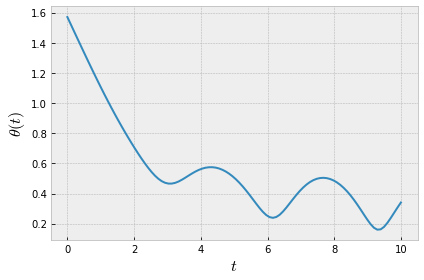

In [14]:
# plot theta for varying t

ts = np.linspace(0, 10, 100)
theta_f = smp.lambdify([t], theta)

theta_vals = theta_f(ts)
plt.plot(ts, theta_vals)
plt.xlabel(r'$t$', fontsize=16)
plt.ylabel(r'$\theta(t)$', fontsize=16)
plt.tight_layout()
plt.show()

## integrate

In [15]:
r = smp.Matrix([smp.exp(t)*smp.cos(t), t**4, 1/(1+t**2)])
r

Matrix([
[exp(t)*cos(t)],
[         t**4],
[ 1/(t**2 + 1)]])

In [16]:
smp.integrate(r, t)

Matrix([
[exp(t)*sin(t)/2 + exp(t)*cos(t)/2],
[                           t**5/5],
[                          atan(t)]])

In [17]:
# some case cannot be integrated symbolically
# numerically integrate using scipy

r = smp.Matrix([smp.exp(t**2)*smp.cos(t)**3, smp.exp(-t**4), 1/(3+t**2)])
r

Matrix([
[exp(t**2)*cos(t)**3],
[         exp(-t**4)],
[       1/(t**2 + 3)]])

In [18]:
r_f = smp.lambdify([t], r)
r_f

<function _lambdifygenerated(t)>

In [19]:
from scipy.integrate import quad_vec

In [20]:
# integrate from 0 to 4

quad_vec(r_f, 0, 4)[0]

array([[-4.83559254e+05],
       [ 9.06402477e-01],
       [ 6.70972506e-01]])

# Partial derivatives

In [21]:
x, y, z = smp.symbols('x y z')

In [22]:
f = y**2 * smp.sin(x+y)
f

y**2*sin(x + y)

In [23]:
smp.diff(f, x)

y**2*cos(x + y)

In [24]:
smp.diff(f, y)

y**2*cos(x + y) + 2*y*sin(x + y)

In [25]:
smp.diff(f, x, y, y)

-y**2*cos(x + y) - 4*y*sin(x + y) + 2*cos(x + y)

## chain rule

In [26]:
t = smp.symbols('t')
x, y, z, w = smp.symbols('x y z w', cls=smp.Function)

In [27]:
x = x(t)
y = y(t)
z = z(t)
w = w(x, y, z)

In [28]:
w

w(x(t), y(t), z(t))

In [29]:
smp.diff(w, t)

Derivative(w(x(t), y(t), z(t)), x(t))*Derivative(x(t), t) + Derivative(w(x(t), y(t), z(t)), y(t))*Derivative(y(t), t) + Derivative(w(x(t), y(t), z(t)), z(t))*Derivative(z(t), t)

# Gradients

In [30]:
import sympy.vector as smp_vec

In [31]:
C = smp_vec.CoordSys3D('')

In [32]:
f = C.x * smp.sin(C.y)
f

.x*sin(.y)

In [33]:
smp_vec.gradient(f)

(sin(.y))*.i + (.x*cos(.y))*.j

In [34]:
smp_vec.gradient(f).to_matrix(C)

Matrix([
[   sin(.y)],
[.x*cos(.y)],
[         0]])

In [35]:
smp_vec.gradient(f).to_matrix(C).subs([(C.y, 1)])

Matrix([
[   sin(1)],
[.x*cos(1)],
[        0]])

# Directional Derivatives

$$D_u f = \nabla f \cdot u$$

In [36]:
u = 4*C.i - 3*C.j + 2*C.k
u 

4*.i + (-3)*.j + 2*.k

In [37]:
u = u.normalize()
u 

(4*sqrt(29)/29)*.i + (-3*sqrt(29)/29)*.j + (2*sqrt(29)/29)*.k

In [38]:
smp_vec.gradient(f).dot(u)

-3*sqrt(29)*.x*cos(.y)/29 + 4*sqrt(29)*sin(.y)/29

# Extreme Values and Saddle Points

Extreme values of $f(x,y)$ can occur at

1. Boundary points of the domain of 
2. Critical Points $(f_x = f_y = 0)$

If

* $f_{xx} < 0$ and $f_{xx}f_{yy} - f_{xy}^2 > 0$ at (a,b) then **local maximum**
* $f_{xx} > 0$ and $f_{xx}f_{yy} - f_{xy}^2 > 0$ at (a,b) then **local minimum**
* $f_{xx}f_{yy} - f_{xy}^2 < 0$ at (a,b) then **saddle point**
* $f_{xx}f_{yy} - f_{xy}^2 = 0$ at (a,b) then **inconclusive**

In [39]:
x, y = smp.symbols('x y', real=True)
f = x**3 + 3*x*y + y**3
f

x**3 + 3*x*y + y**3

In [40]:
# solve for critical point (fx = fy = 0)

smp.solve([smp.diff(f, x), smp.diff(f, y)])

[{x: -1, y: -1}, {x: 0, y: 0}]

In [41]:
fxx = smp.diff(f, x, x)
fyy = smp.diff(f, y, y)
fxy = smp.diff(f, x, y)

In [42]:
# check fxx

fxx.subs([(x, -1), (y, -1)])

-6

In [43]:
# check fxx*fyy - fxy^2

(fxx*fyy - fxy**2).subs([(x, -1), (y, -1)])

# --> local maximum

27

# Lagrange Multipliers

Minimize $f(x,y,z)$ subject to the constraint $g(x,y,z)=0$ <br>
Solving two equations
1. $\nabla f = \lambda \nabla g$
2. $g(x,y,z) = 0$

**Example** <br>
$f = 8x^2 + 4yz -16z + 600$ <br>
$g = 4x^2 + y^2 + 4z^2 -16 = 0$

In [44]:
C = smp_vec.CoordSys3D('')
lamb = smp.Symbol('\lambda')

In [45]:
f = 8*C.x**2 + 4*C.y*C.z - 16*C.z + 600
g = 4*C.x**2 + C.y**2 + 4*C.z**2 -16

In [46]:
f

8*.x**2 + 4*.y*.z - 16*.z + 600

In [47]:
g

4*.x**2 + .y**2 + 4*.z**2 - 16

In [48]:
eq1 = smp_vec.gradient(f) - lamb*smp_vec.gradient(g)
eq1 = eq1.to_matrix(C)
eq1

Matrix([
[   -8*.x*\lambda + 16*.x],
[    -2*.y*\lambda + 4*.z],
[4*.y - 8*.z*\lambda - 16]])

In [49]:
eq2 = g
eq2

4*.x**2 + .y**2 + 4*.z**2 - 16

In [50]:
sols = smp.solve([eq1, eq2])
sols

[{.x: -4/3, .y: -4/3, .z: -4/3, \lambda: 2},
 {.x: 0, .y: -2, .z: -sqrt(3), \lambda: sqrt(3)},
 {.x: 0, .y: -2, .z: sqrt(3), \lambda: -sqrt(3)},
 {.x: 0, .y: 4, .z: 0, \lambda: 0},
 {.x: 4/3, .y: -4/3, .z: -4/3, \lambda: 2}]

In [51]:
for sol in sols:
    print(f.subs(sol).evalf())

642.666666666667
641.569219381653
558.430780618347
600.000000000000
642.666666666667


# Multiple Integrals
* most cases cannot be done symbolically
* better use scipy

$$\int_{0}^{1} \int_{0}^{1-x^2} \int_{3}^{4-x^2-y^2} xe^{-y}\cos(z) dzdydx$$

In [52]:
from scipy.integrate import tplquad

In [53]:
# need to be in correct order
# in this case: z y x (dzdydx)

f = lambda z, y, x : x*np.exp(-y)*np.cos(z)
tplquad(f,
        0, 1,
        lambda x: 0, lambda x: 1-x**2,
        lambda x,y: 3, lambda x,y: 4-x**2-y**2)

(-0.09109526451447894, 1.5233411688190285e-14)